# **Mục lục:**
## Phần 1: Giới thiệu
- **1.1 Bối cảnh và mục đích**
- **1.2 Giới thiệu về bộ dữ liệu**
## Phần 2: Khám phá tập dữ liệu
- **2.1 Gộp dữ liệu**
- **2.2 Tổng quan tập dữ liệu**
- **2.3 Xử lí và làm sạch dữ liệu**
    - **Dữ liệu thiếu**
    - **Dữ liệu trùng lặp**
    - **Chuyển đổi dữ liệu**
## Phần 3: Phân tích và trực quan hóa dữ liệu
- **3.1 Phân tích mô tả**
- **3.2 Phân tích hành vi**
## Phần 4: Kết luận
- **4.1 Tóm tắt phát hiện**
- **4.2 Chiến lược phát triển**

# Phần 1: Giới thiệu

##1.1 Bối cảnh và mục đích:

Cyclistic là công ty cung cấp dịch vụ chia sẻ xe đạp ở Chicago, với hai nhóm khách hàng chính là người đi xe không thường xuyên (mua vé một lần hoặc cả ngày) và thành viên hàng năm (mua gói thành viên). Công ty Cyclistic cần phân tích dữ liệu lịch sử các chuyến đi để hiểu rõ sự khác biệt giữa hai nhóm khách hàng. Qua đó đưa ra những chiên lược góp phần phát triển công ty trong tương lai.

##1.2 Giới thiệu về bộ dữ liệu:

Bộ dữ liệu được cung cấp bởi công ty Cyclistic chứa thông tin lịch sử của hơn 5,700,000 chuyến đi xe đạp trong hệ thống chia sẻ xe đạp tại Chicago trong năm 2023. Dữ liệu này sẽ là cơ sở để phân tích khách hàng và đề xuất chiến lược kinh doanh cho công ty.

# Phần 2: Khám phá tập dữ liệu

##2.1 Gộp dữ liệu:

Bộ dữ liệu ban đầu bao gồm 12 tệp riêng lẻ, mỗi tệp chứa thông tin các chuyến đi trong từng tháng của năm 2023. Để thuận tiện cho việc phân tích, các tệp này đã được hợp nhất thành một file dữ liệu tổng hợp

Công cụ sử dụng: Python với thư viện os để tự động duyệt qua các tệp dữ liệu trong thư mục, kết hợp với thư viện pandas để đọc và gộp dữ liệu lại thành một file duy nhất.

In [ ]:
import os
# Thư viện thao tác với dataframe
import pandas as pd

# Đường dẫn đến thư mục chứa dữ liệu
folder_path = 'path/to/your/csv/files'

# Lấy danh sách file CSV trong thư mục
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Tạo một danh sách để lưu các DataFrame
data_frames = []

# Lặp qua từng file và đọc dữ liệu
for file in file_list:
    file_path = os.path.join(folder_path, file)  # Tạo đường dẫn đầy đủ
    df = pd.read_csv(file_path)                 # Đọc file CSV
    data_frames.append(df)                      # Thêm DataFrame vào danh sách

# Gộp tất cả các DataFrame lại thành một
merged_data = pd.concat(data_frames, ignore_index=True)

# Đặt tên file xuất ra
output_file_name = 'merged_2023.csv'

# Tạo đường dẫn đầy đủ cho file xuất ra
output_path = os.path.join(folder_path, output_file_name)

# Lưu dữ liệu đã gộp vào file CSV trong thư mục chứa các file gốc
merged_data.to_csv(output_path, index=False)

##2.2 Tổng quan dữ liệu:

In [4]:
# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Thư viện thao tác với ma trận
import numpy as np

In [ ]:
# Đọc dữ liệu
df = pd.read_csv('merged_2023.csv')

In [6]:
# Xem 5 hàng đầu của dữ liệu
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [7]:
# Xem số dòng, cột của dữ liệu
df.shape

(5719877, 13)

Tập dữ liệu này có khoảng gần 5,719,877 dòng và 13 cột

In [8]:
# Xem kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


Tập dữ liệu mới này gồm có 13 cột, dưới đây là thông tin mô tả về các cột:

|STT| Tên cột | Mô Tả | Kiểu dữ liệu |
|---|--------|---------------------------|------|
|1| ride_id | Mã định danh duy nhất của chuyến đi| Object |
|2| rideable_type  | Loại phương tiện được sử dụng trong chuyến đi (ví dụ: xe đạp, xe đạp điện) | Object |
|3| started_at | Thời gian bắt đầu chuyến đi|Object (nên chuyển đổi thành datetime nếu xử lý thời gian)|
|4| ended_at |  Thời gian kết thúc chuyến đi| Object (nên chuyển đổi thành datetime nếu xử lý thời gian) |
|5|start_station_name|Tên trạm xuất phát của chuyến đi|Object|
|6|start_station_id |Mã định danh trạm xuất phát | Object |
|7|end_station_name|Tên trạm đích của chuyến đi|Object|
|8|end_station_id |Mã định danh trạm đích|Object|
|9|start_lat|Vĩ độ của trạm xuất phát|Float64|
|10|start_lng|Kinh độ của trạm xuất phát|Float64|
|11| end_lat |Vĩ độ của trạm đích|Float64|
|12| end_lng  |Kinh độ của trạm đích|Float64|
|13|member_casual |Phân loại người dùng (thành viên hoặc người dùng không thường xuyên)|Object|

##2.3 Xử lí và làm sạch dữ liệu:

### Dữ liệu thiếu

In [9]:
# Kiểm tra số lượng dữ liệu thiếu
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

- Cột start_station_name có 875,716 giá trị thiếu
- Cột start_station_id có 875,848 giá trị thiếu
- Cột end_station_name có 929,202 giá trị thiếu
- Cột end_station_id có 929,343 giá trị thiếu
- Hai cột end_lat và end_lng có 6,990 giá trị thiếu

In [10]:
# Kiểm tra giá trị thiếu chiếm bao nhiêu % trong tập dữ liệu
(df.isna().sum() / df.count()) * 100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    18.077764
start_station_id      18.080982
end_station_name      19.396056
end_station_id        19.399570
start_lat              0.000000
start_lng              0.000000
end_lat                0.122355
end_lng                0.122355
member_casual          0.000000
dtype: float64

- Tình trạng dữ liệu thiếu:
Một số cột, bao gồm start_station_name, start_station_id, end_station_name, và end_station_id, có giá trị thiếu chiếm khoảng 19% tổng số dữ liệu. Những giá trị này không được xử lý (điền hoặc loại bỏ) để giữ nguyên tính toàn vẹn của dữ liệu gốc.

- Lý do giữ nguyên dữ liệu thiếu:

Không thể loại bỏ dòng vì làm như vậy sẽ gây mất mát đáng kể dữ liệu (19%).

Không có cách hợp lý để điền giá trị thay thế do thiếu thông tin bổ sung, và việc điền sai có thể gây sai lệch trong phân tích.

- Còn đối với cột end_lat và end_lng số lượng giá trị thiếu không đáng kể ta tiến hành xóa chúng.

In [11]:
# xóa giá trị thiếu đối với hai cột end_lat và end_lng
df.dropna(subset = ['end_lat', 'end_lng'], inplace = True)

In [ ]:
# Dán nhãn cho giá trị thiếu giữ tính toàn vẹn của dữ liệu
df['start_station_name'].fillna('Unknow', inplace = True)
df['start_station_id'].fillna('Unknown', inplace=True)
df['end_station_name'].fillna('Unknown', inplace=True)
df['end_station_id'].fillna('Unknown', inplace=True)

In [13]:
# Kiểm tra
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Đã xử lí xong dữ liệu thiếu

### Dữ liệu trùng lặp

In [14]:
# Kiểm tra số lượng dữ liệu trùng lặp
df.duplicated().sum()

np.int64(0)

Không có dữ liệu trùng lặp

### Chuyển đổi dữ liệu

In [15]:
# Đổi tên cột 'member_casual'
df.rename(columns={'member_casual': 'customer_type'}, inplace=True)

In [16]:
# Chuyển cột thời gian từ object sang datetime:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

Tạo thêm cột ngày, tháng, giờ và các ngày trong tuần từ cột started_at

In [17]:
df['start_day'] = df['started_at'].dt.day             # Lấy phần ngày(1-31)
df['start_month'] = df['started_at'].dt.month         # Lấy phần tháng (1-12)
df['start_hour'] = df['started_at'].dt.hour           # Lấy phần giờ(0-23)
df['day_of_week'] = df['started_at'].dt.day_name()    # Các ngày trong tuần

Việc tạo các cột thời gian như ngày, tháng, giờ, và ngày trong tuần không chỉ giúp tổ chức dữ liệu tốt hơn mà còn cung cấp góc nhìn chi tiết về hành vi của người dùng.

In [18]:
# TÍnh thời gian mỗi chuyến đi (phút)
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Phần 3: Phân tích và trực quan hóa dữ liệu

##3.1 Phân tích mô tả:

### Tổng quan thời gian chuyến đi (trip_duration)

In [19]:
df['trip_duration'].describe()

count    5.712887e+06
mean     1.514329e+01
std      3.648623e+01
min     -1.665652e+04
25%      5.416667e+00
50%      9.516667e+00
75%      1.688333e+01
max      1.213630e+04
Name: trip_duration, dtype: float64

Mô tả cơ bản nhiều giá trị còn chưa hợp lí

- Giá trị nhỏ nhất có giá trị âm. Điều này cho thấy một số lỗi trong dữ liệu.
- Độ lệch chuẩn là khoảng 36.49 phút. Điều này cho thấy có sự phân tán lớn trong thời gian di chuyển. Một số chuyến đi có thể rất ngắn, trong khi một số khác có thể kéo dài hơn nhiều so với giá trị trung bình.
- 75% chuyến đi có thời gian khoảng 17 phút trở xuống nhưng chuyến đi có thời gian dài nhất khoảng 12136 phút (~8 ngày). Những chuyến đi này có thể gặp một số lỗi như hệ thống ghi nhận sai hay quên trả lại xe trong quá trình sử dụng.

In [20]:
# Lọc dữ liệu trong khoảng hợp lí (0-120 phút)
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] <= 120)]

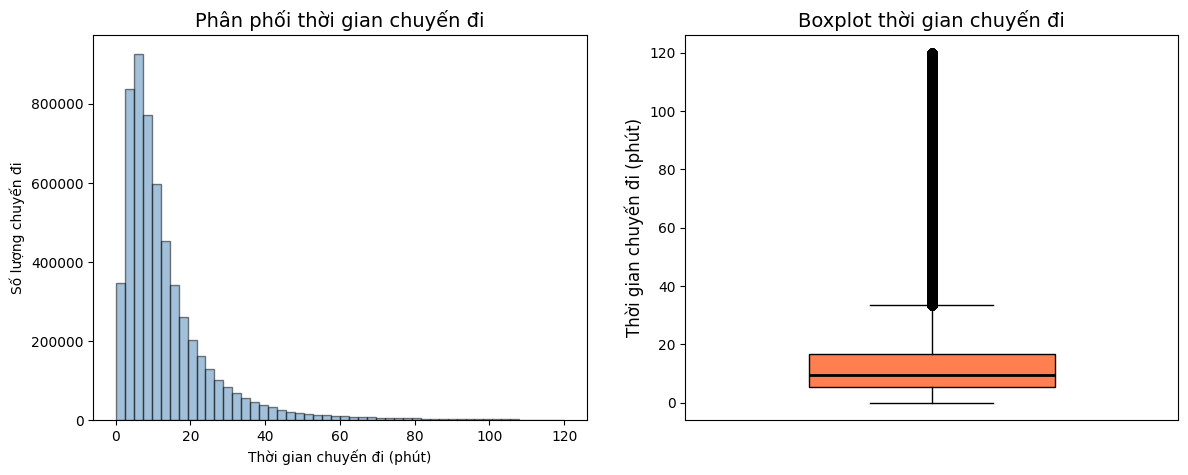

In [21]:
plt.figure(figsize = (14, 5))
# chart 1: Histogram
ax1 = plt.subplot(1, 2, 1)
plt.hist(df['trip_duration'], bins = 50,alpha = 0.5, edgecolor = 'black', color='steelblue')
plt.title("Phân phối thời gian chuyến đi", fontsize=14)
plt.xlabel("Thời gian chuyến đi (phút)")
plt.ylabel("Số lượng chuyến đi")


# chart 2: Boxplot
ax2 = plt.subplot(1, 2, 2)
plt.boxplot(df['trip_duration'], 
            patch_artist=True,
            widths = 0.5, 
            boxprops=dict(facecolor="coral", color="black"), 
            medianprops=dict(color="black", linewidth=2), 
            ) 
plt.title("Boxplot thời gian chuyến đi", fontsize=14)
plt.ylabel("Thời gian chuyến đi (phút)", fontsize=12)
plt.xticks([])  
plt.show()

Histogram (bên trái) - Phân phối thời gian chuyến đi

- Biểu đồ cho thấy phân phối lệch phải, nghĩa là phần lớn các chuyến đi có thời gian ngắn, nhưng có một số chuyến kéo dài rất lâu.
- Phần lớn chuyến đi rơi vào khoảng dưới 20 phút, với đỉnh phân phối (mode) khoảng 5-10 phút.
- Có một số chuyến kéo dài trên 60 phút, nhưng tần suất của chúng rất thấp.

Boxplot (bên phải) - Kiểm tra giá trị ngoại lai

- Khoảng IQR kéo dài từ 5-17 phút, phần lớn chuyến đi có thời gian nằm trong khoảng này.
- Các giá trị ngoại lai rất nhiều (hơn 75% dữ liệu nằm dưới 20 phút, nhưng có nhiều chuyến trên 40 phút và thậm chí trên 100 phút).
- Điều này xác nhận rằng có nhiều chuyến đi bất thường hoặc quá dài, có thể là do lỗi dữ liệu hoặc trường hợp đặc biệt.

Lọc ngoại lai

In [22]:
# Tính Q1, Q3 và IQR
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc dữ liệu giữ lại các giá trị trong khoảng hợp lý
df_cleaned = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]

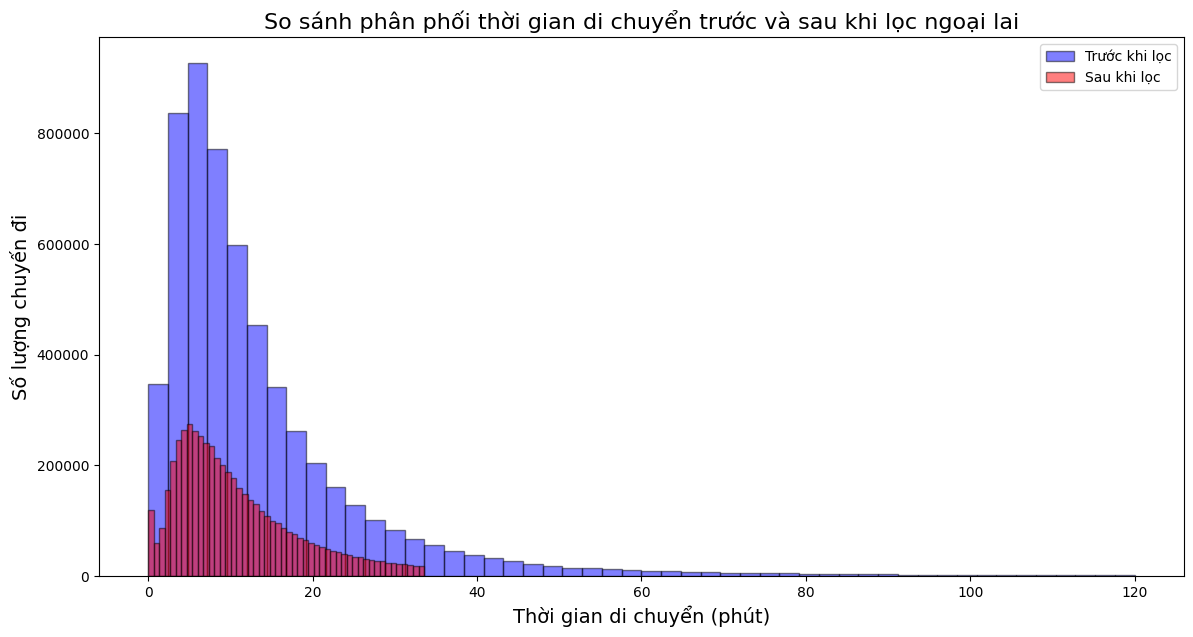

In [23]:

plt.figure(figsize=(14,7))

# Trước khi lọc
plt.hist(df['trip_duration'], bins = 50, color='blue', alpha = 0.5, edgecolor = 'black', label='Trước khi lọc')

# Sau khi lọc
plt.hist(df_cleaned['trip_duration'], bins = 50, color='red', alpha = 0.5, edgecolor = 'black', label='Sau khi lọc')

plt.legend()
plt.title("So sánh phân phối thời gian di chuyển trước và sau khi lọc ngoại lai", fontsize = 16)
plt.xlabel("Thời gian di chuyển (phút)", fontsize = 14)
plt.ylabel("Số lượng chuyến đi", fontsize = 14)
plt.show()


Sau khi loại bỏ các giá trị ngoại lai, phân phối thời gian di chuyển vẫn giữ nguyên xu hướng ban đầu. Điều này cho thấy các giá trị ngoại lai không ảnh hưởng đáng kể đến mô hình chung của dữ liệu. Do đó, việc loại bỏ giúp làm sạch dữ liệu mà không làm mất đi tính đại diện của tập dữ liệu, giúp phân tích chính xác hơn.

### Phân phối loại phương tiện (rideable_type)

In [24]:
df_ride_type = df_cleaned.groupby("rideable_type").agg(total = ("ride_id", "count")).reset_index().sort_values(by = 'total', ascending=False)

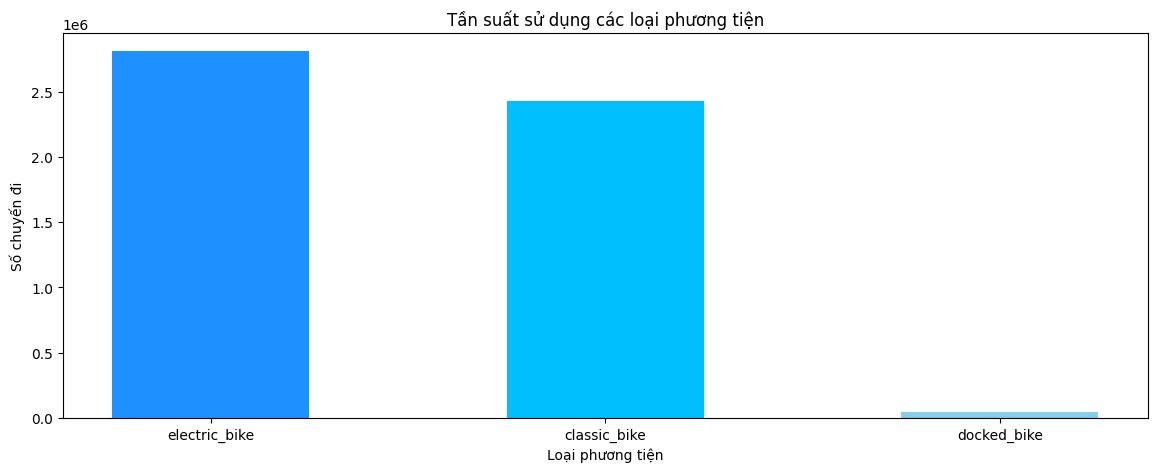

In [25]:
plt.figure(figsize=(14, 5))
plt.bar(df_ride_type["rideable_type"], df_ride_type["total"], color = ["dodgerblue", "deepskyblue", "skyblue"], width= 0.5)
plt.xlabel("Loại phương tiện")
plt.ylabel("Số chuyến đi")
plt.title("Tần suất sử dụng các loại phương tiện")
plt.show()

- Xe đạp điện (electric_bike) được sử dụng nhiều nhất với hơn 2.7 triệu chuyến đi.
- Xe đạp truyền thống (classic_bike) đứng thứ 2 với hơn 2.4 triệu chuyến đi.
- Xe đạp neo đậu (docked_bike) có lượng sử dụng ít nhất với chưa đến 50.000 chuyến đi.

Tổng quan: Xe đạp điện và xe đạp truyền thống là hai loại phương tiện được sử dụng phổ biến nhất, trong khi xe đạp neo đậu có lượng sử dụng rất thấp.

### Phân phối nhóm khách hàng (customer_type)

In [26]:
df_customer = df_cleaned.groupby('customer_type').agg(total = ('ride_id', 'count')).reset_index()

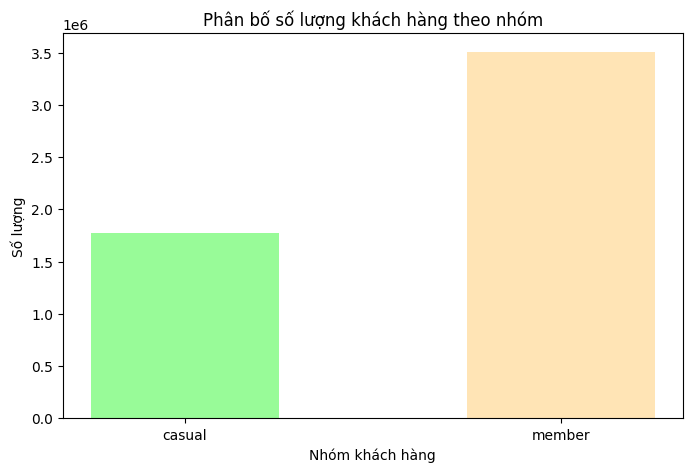

In [27]:
plt.figure(figsize=(8, 5))
plt.bar(df_customer['customer_type'], df_customer['total'], color = ['palegreen', 'moccasin'], width= 0.5)
plt.xlabel("Nhóm khách hàng")
plt.ylabel("Số lượng")
plt.title("Phân bố số lượng khách hàng theo nhóm")
plt.show()


- Nhóm "member" có số lượng khách hàng nhiều hơn nhóm "casual".
- Số lượng khách hàng thuộc nhóm "member" là khoảng 3,4 triệu người.
- Số lượng khách hàng thuộc nhóm "casual" là khoảng 1,7 triệu người.

Tổng quan: Nhóm "member" là nhóm khách hàng chính của công ty, chiếm số lượng lớn hơn nhóm "casual".

##3.2 Phân tích hành vi:

In [28]:
member = df_cleaned[df_cleaned['customer_type'] == 'member']['trip_duration']
casual = df_cleaned[df_cleaned['customer_type'] == 'casual']['trip_duration']

C:\Users\Admin\AppData\Local\Temp\ipykernel_10912\2435136146.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([member, casual],


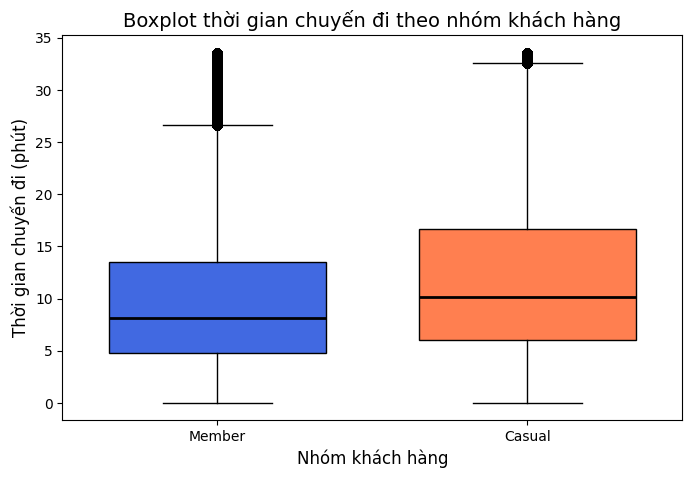

In [36]:
# Boxplot thời gian di chuyển của nhóm khách hàng
plt.figure(figsize=(8, 5))
box = plt.boxplot([member, casual], 
                  labels=['Member', 'Casual'], 
                  widths=0.7, 
                  patch_artist=True,
                  medianprops=dict(color="black", linewidth=2))
colors = ['royalblue', 'coral']  
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color) 

plt.xlabel("Nhóm khách hàng", fontsize=12)
plt.ylabel("Thời gian chuyến đi (phút)", fontsize=12)
plt.title("Boxplot thời gian chuyến đi theo nhóm khách hàng", fontsize=14)
plt.show()

Khách hàng casual có thời gian chuyến đi dài hơn khách hàng member:

- Trung vị của nhóm casual cao hơn nhóm member, cho thấy casual thường có chuyến đi dài hơn.
- Phần trên của boxplot của casual cũng cao hơn, nghĩa là phần lớn khách casual có chuyến đi dài hơn member.

Nhóm member có khoảng thời gian chuyến đi ổn định hơn:

- IQR (khoảng giữa Q1 và Q3) của member nhỏ hơn casual, chứng tỏ phần lớn chuyến đi của member có độ ổn định cao, ít thay đổi.
- Trong khi đó, khách casual có sự biến động lớn hơn, có thể là do họ không quen thuộc hệ thống hoặc có mục đích sử dụng khác nhau.

Ngoại lai (outliers):

- Cả hai nhóm đều có một số chuyến đi kéo dài trên 30 phút, nhưng khách casual có một số chuyến đi dài hơn so với khách member.
- Điều này có thể do khách casual sử dụng xe để đi chơi hoặc khám phá, trong khi member thường dùng xe cho những chuyến đi ngắn và đều đặn hơn.

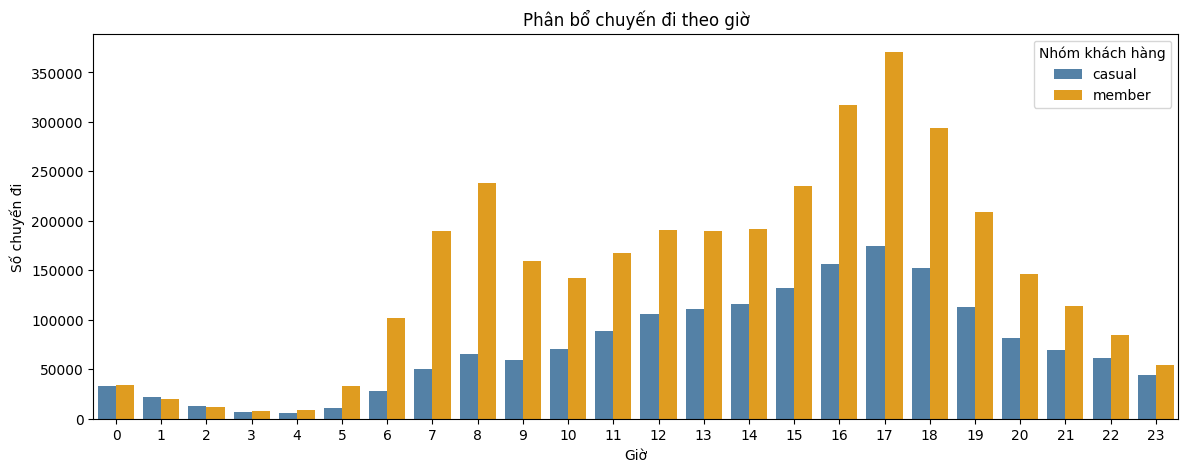

In [30]:
# chart phân bổ chuyến đi theo giờ
hour_use = df_cleaned.groupby(['customer_type', 'start_hour']).agg(total=('ride_id', 'count')).reset_index()
plt.figure(figsize=(14, 5))
sns.barplot(data=hour_use, x='start_hour', y='total', hue='customer_type', palette=['steelblue', 'orange'])
plt.title("Phân bổ chuyến đi theo giờ")
plt.xlabel("Giờ")
plt.ylabel("Số chuyến đi")
plt.legend(title="Nhóm khách hàng")
plt.show()

Nhóm member

- Số lượng chuyến đi của nhóm này cao hơn đáng kể so với nhóm casual trong hầu hết các khung giờ.
- Hai khung giờ cao điểm rõ rệt:
    - Buổi sáng (7h-9h): Số lượng chuyến đi tăng mạnh, đạt điểm vào khoảng 8h sáng.
    - Buổi chiều (16h-18h): Đây là khoảng thời gian có lưu lượng chuyến đi nhiều nhất trong ngày, cao nhất khoảng 17h.
- Điều này cho thấy thành viên thường sử dụng xe đạp để đi làm hoặc đi học

Nhóm casual

- Số lượng chuyến đi tăng dần từ sáng đến chiều, nhưng cao điểm không rõ ràng như nhóm member.
- Đạt đỉnh vào khoảng 17h nhưng không quá chênh lệch so với các giờ khác.
- Sau 18h, số lượng chuyến đi giảm dần nhưng vẫn duy trì ổn định hơn so với nhóm member vào buổi tối.
- Điều này có thể do khách casual sử dụng xe đạp để đi dạo hoặc tham quan nhiều hơn là di chuyển cố định hàng ngày.

In [31]:
week_day = df_cleaned.groupby(['day_of_week', 'customer_type']).agg(total = ('ride_id', 'count')).reset_index()

In [32]:
week_order = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
week_day['day_of_week'] = pd.Categorical(week_day['day_of_week'], categories = week_order, ordered = True)
week_day.sort_values('day_of_week', inplace = True)

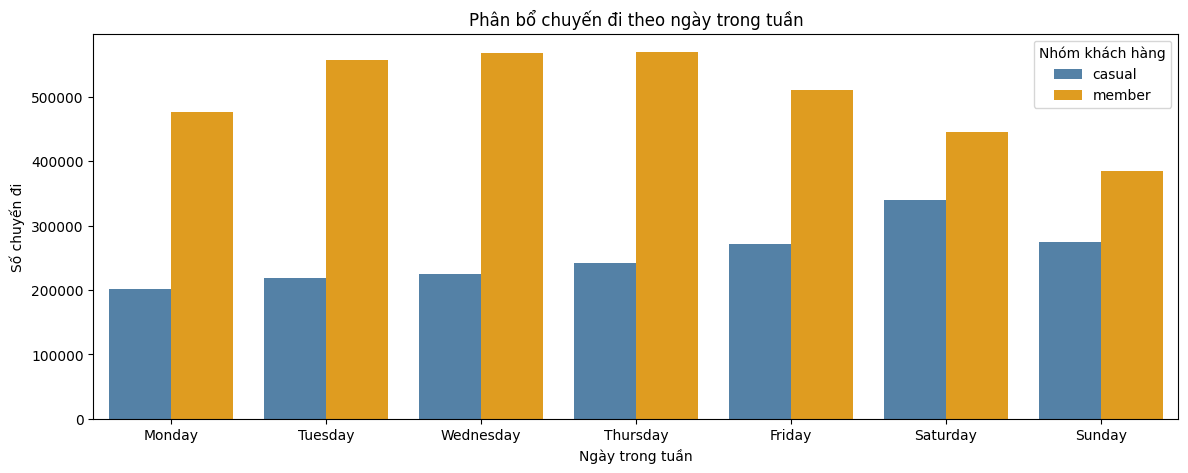

In [33]:
# chart phân bổ theo ngày trong tuần
plt.figure(figsize = (14, 5))
sns.barplot(data = week_day, x = 'day_of_week', y = 'total', hue = 'customer_type', palette=['steelblue', 'orange'])
plt.xlabel("Ngày trong tuần")
plt.ylabel("Số chuyến đi")
plt.title("Phân bổ chuyến đi theo ngày trong tuần")
plt.legend(loc = 'upper right',title = 'Nhóm khách hàng')
plt.show()

Nhóm member

- Số lượng chuyến đi cao nhất từ thứ ba đến thứ năm, cho thấy hành vi đi lại ổn định trong tuần làm việc.
- Giảm nhẹ vào thứ sáu và thứ hai, có thể do một số khách hàng member làm việc linh hoạt hơn vào đầu và cuối tuần.
- Giảm mạnh vào cuối tuần, chứng tỏ member chủ yếu sử dụng xe đạp để đi làm hoặc đi học.

Nhóm casual

- Số lượng chuyến đi thấp hơn trong các ngày làm việc từ thứ hai đến thứ sáu.
- Tăng mạnh vào thứ bảy và chủ nhật, gần bằng (hoặc hơn) so với nhóm thành viên.
- Điều này cho thấy khách casual chủ yếu sử dụng xe đạp để giải trí, du lịch hoặc tham quan vào cuối tuần.

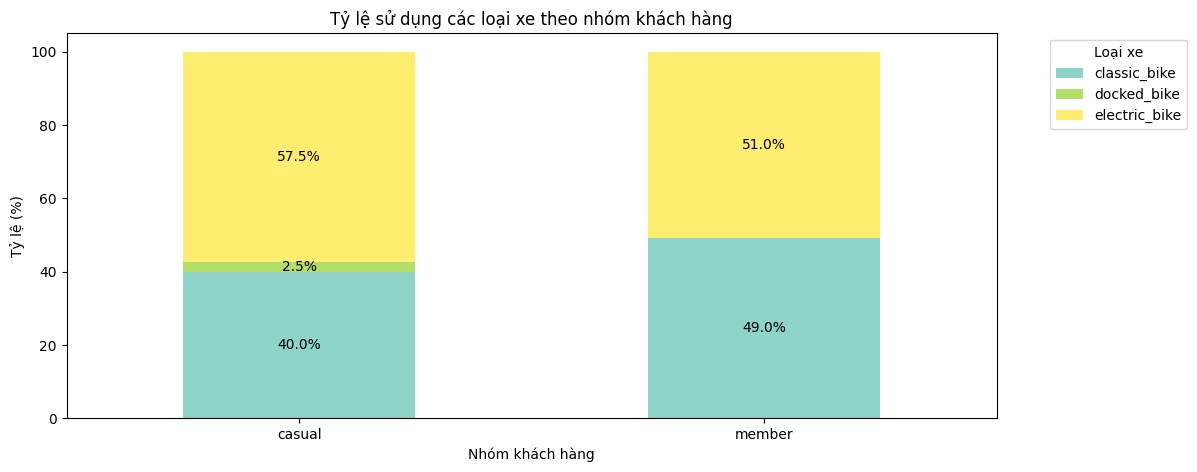

In [34]:
grouped_ride_type = df_cleaned.groupby(["customer_type", "rideable_type"]).size().unstack()

grouped_percent = grouped_ride_type.div(grouped_ride_type.sum(axis=1), axis=0) * 100
ax = grouped_percent.plot(kind="bar", stacked=True, figsize=(12, 5), colormap="Set3")

# Thêm nhãn phần trăm trên các thanh
for container in ax.containers:
    labels = [f"{v:.1f}%" if v > 0 else "" for v in container.datavalues] 
    ax.bar_label(container, labels=labels, label_type="center", fontsize=10, color="black")
plt.title("Tỷ lệ sử dụng các loại xe theo nhóm khách hàng")
plt.xlabel("Nhóm khách hàng")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=0)
plt.legend(title="Loại xe", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Nhóm casual

- Electric_bike (57.5%) là lựa chọn phổ biến nhất
    - Nhóm casual sử dụng xe đạp điện với tỷ lệ cao nhất.
    - Có thể do:
        - Xe đạp điện tiện lợi hơn.
        - Phù hợp với chuyến đi dài và nhóm casual muốn di chuyển nhanh hơn.

- Classic_bike (40%) là lựa chọn thứ hai
    - Dù ít hơn xe đạp điện, classic bike vẫn chiếm tỷ lệ lớn trong nhóm casual.
    - Có thể do:
        - Chi phí rẻ hơn xe đạp điện.
        - Một số khách thích cảm giác đạp xe truyền thống.

- Docked_bike (2.5%) ít được ưa chuộng
    - Docked bike chiếm tỷ lệ rất nhỏ.
    - có thể do:
        - Hệ thống dock không tiện lợi, khiến nhóm casual ít sử dụng.
        - Không dễ tìm hoặc không phổ biến như các loại xe khác.

Nhóm member

- Electric_bike (51%) là lựa chợn hàng đầu
    - Member cũng ưu tiên sử dụng xe đạp điện, nhưng tỷ lệ thấp hơn một chút so với casual.
    - Điều này cho thấy xe đạp điện không chỉ thu hút casual mà còn member ưa chuộng.
    - Tuy nhiên, sự chênh lệch giữa Classic bike và Electric bike nhỏ hơn so với nhóm Casual, cho nhóm member không quá phụ thuộc vào xe điện.

- Classic_bike (49.0%) có tỷ lệ gần ngang với electric_bike
    - Member có xu hướng sử dụng Classic bike nhiều hơn Casual.
    - Có thể do:
        - Chi phí thuê classic bike có thể rẻ hơn so với electric bike.
        - Member thường có thời gian di chuyển ngắn và classic bike phù hợp cho điều này.

- Docked_bike không được member sử dụng
    - Không có member nào sử dụng docked_bike
    - Có thể do:
        - Docked bike không còn phổ biến hoặc không có sẵn cho member.
        - Thành viên có nhiều lựa chọn tiện lợi hơn (electric & classic bike).

# Phần 4: Kết luận

##4.1 Tóm tắt phát hiện:

### 1. Thời gian chuyến đi
- Member: Thời gian di chuyển ngắn hơn (~7-10 phút), phản ánh hành vi di chuyển nhanh, thường xuyên.
- Casual: Thời gian di chuyển dài hơn (~10-15 phút), có nhiều chuyến đi kéo dài trên 30 phút, cho thấy mục đích sử dụng khác biệt.
- Chú thích: Khách casual có xu hướng khám phá nhiều hơn, gợi ý cơ hội triển khai các dịch vụ như thuê xe dài hạn hoặc combo du lịch.

### 2. Hành vi sử dụng xe theo thời gian trong ngày
- Member: Có hai khung giờ cao điểm rõ rệt:
    - Buổi sáng (7h-9h): Chủ yếu phục vụ nhu cầu đi làm, đi học.
    - Buổi chiều (16h-18h): Cao điểm lúc 17h, cho thấy nhiều người dùng xe để về nhà sau giờ làm việc.
- Casual: Không có cao điểm rõ ràng, số chuyến đi tăng dần trong ngày và đạt đỉnh vào khoảng 17h. Điều này cho thấy khách casual chủ yếu dùng xe cho mục đích giải trí hoặc đi dạo.
- Chú thích: Sự khác biệt này cho thấy member có xu hướng sử dụng xe theo lịch trình cố định (commute), trong khi casual dùng xe linh hoạt hơn.

### 3. Hành vi sử dụng xe theo ngày trong tuần
- Member: Hoạt động mạnh nhất vào thứ 3 - thứ 5, giảm nhẹ vào thứ 2 và thứ 6, giảm mạnh vào cuối tuần.
- Casual: Ít sử dụng xe trong tuần nhưng tăng mạnh vào thứ 7 và chủ nhật, gần bằng (hoặc cao hơn) nhóm member vào cuối tuần.

### 4. Loại xe được sử dụng
- Member chủ yếu sử dụng classic bike (49%), cho thấy họ quan tâm đến tính kinh tế và tiện lợi.
- Casual sử dụng electric bike nhiều hơn (57.5%), cho thấy họ sẵn sàng trả thêm để có trải nghiệm tốt hơn.
- Chú thích: Điều này gợi ý rằng việc đẩy mạnh quảng bá xe điện có thể thu hút khách casual, trong khi ưu đãi gói dài hạn cho xe classic có thể hấp dẫn member.

##4.2 Chiến lược phát triển:

### 1. Chiến lược giá và gói cước linh hoạt

Đối với nhóm Member (Khách hàng thường xuyên)

- Gói ưu đãi theo tháng/quý/năm:
    - Giảm giá đăng ký dài hạn cho những người sử dụng xe đạp truyền thống để đi làm.
    - Tích hợp thêm ưu đãi khi kết hợp với các dịch vụ giao thông công cộng (ví dụ: giảm giá nếu có thẻ tàu điện/người đi làm).

- Chương trình thưởng điểm:
    - Đi càng nhiều, giảm giá càng lớn (ví dụ: sau mỗi 50 chuyến, tặng 1 tuần miễn phí).
    - Hợp tác với các quán cà phê/nhà hàng/cửa hàng tiện lợi để tặng ưu đãi giảm giá cho khách hàng thành viên.

Đối với nhóm Casual (Khách vãng lai, khách du lịch)

- Gói thuê xe theo giờ/ngày:
    - Tích hợp dịch vụ thuê xe 1 ngày hoặc 3 ngày với mức giá trọn gói cho khách du lịch.
    - Triển khai gói "Weekend Pass" (chỉ dùng vào thứ 7 - Chủ nhật) với mức giá ưu đãi.

- Gói theo nhu cầu:
    - Giảm giá cho khách casual khi họ đi cùng nhóm (ví dụ: thuê 3 xe trở lên sẽ có ưu đãi).
    - Mua trước số lượt đi (ví dụ: 5 chuyến, 10 chuyến) với mức giá giảm so với từng chuyến lẻ.

- Tận dụng xe điện:
    - Tạo gói combo “xe điện + tour du lịch” cho khách du lịch khám phá thành phố.
    - Gói combo "Electric Pass" cho phép khách hàng trả phí cố định để đi không giới hạn trong ngày.

### 2. Tối ưu vận hành và quản lí xe

- Điều chỉnh số lượng xe theo nhu cầu thực tế:
    - Tăng cường xe đạp tại các khu vực có nhu cầu cao trong giờ cao điểm.
    - Phân bổ lại xe dựa trên dữ liệu sử dụng thực tế (ví dụ: nếu buổi sáng thiếu xe ở khu văn phòng, cần bổ sung xe từ đêm hôm trước)

### 3. Mở rộng dịch vụ & cải thiện trải nghiệm khách hàng

- Bản đồ thông minh và gợi ý tuyến đường:
    - Ứng dụng tích hợp bản đồ với các tuyến đường thân thiện với xe đạp.
    - Đề xuất tuyến đường nhanh nhất cho member và tuyến đường đẹp nhất cho casual.

- Dịch vụ hỗ trợ doanh nghiệp:
    - Cung cấp gói "Bike to Work" cho công ty, hỗ trợ nhân viên thuê xe với giá ưu đãi.
    - Hợp tác với các khu văn phòng lớn để đặt trạm xe gần nơi làm việc.

- Tích hợp công nghệ và app thông minh:
    - Đặt xe trước qua ứng dụng cho phép khách hàng đặt trước xe tại một trạm trong vòng 10-15 phút.
    - Tích hợp tính năng "Đặt xe nhanh" để khách chỉ cần quét mã QR là có thể thuê ngay.

- Chương trình bảo trì & chăm sóc xe:
    - Cho phép khách hàng kiểm tra tình trạng xe trước khi thuê.
    - Hợp tác với cửa hàng sửa xe để cung cấp dịch vụ bảo trì miễn phí cho member.

### 4. Quảng bá và mở rộng thị trường

- Marketing theo nhóm khách hàng mục tiêu:
    - Member: Tổ chức thử thách "Đi làm bằng xe đạp", người đi nhiều nhất mỗi tháng sẽ nhận quà (ví dụ: 1 tháng miễn phí).
    - Casual: Tiến hành chiến dịch "Explore Chicago by Bike". Quảng bá các tuyến đường đẹp nhất trong thành phố qua social media và tạo bản đồ du lịch bằng xe đạp, hợp tác với hướng dẫn viên để tổ chức tour.

- Tận dụng Social Media & KOLs:
    - Tạo thử thách #CyclisticChallenge, khuyến khích khách hàng chia sẻ ảnh/video về chuyến đi của họ để nhận quà.
    - Mời YouTuber/Travel Blogger trải nghiệm & review dịch vụ.
    - Google Ads và Facebook Ads nhắm vào khách du lịch & dân văn phòng tại Chicago.

- Tổ chức sự kiện và cộng đồng xe đạp:
    - Tạo sân chơi như "Ngày hội xe đạp", giúp mọi người trải nghiệm xe và nhận ưu đãi khi đăng ký dịch vụ.
    - Hợp tác với nhóm yêu thích xe đạp để quảng bá trên mạng xã hội.